<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Разбиваем-данные-на-выборки" data-toc-modified-id="Разбиваем-данные-на-выборки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Разбиваем данные на выборки</a></span></li><li><span><a href="#Масштабирование-признаков" data-toc-modified-id="Масштабирование-признаков-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Масштабирование признаков</a></span></li><li><span><a href="#Проверим-наличие-дисбаланса" data-toc-modified-id="Проверим-наличие-дисбаланса-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Проверим наличие дисбаланса</a></span></li><li><span><a href="#Обучение-моделей-до-борьбы-с-дисбалансом" data-toc-modified-id="Обучение-моделей-до-борьбы-с-дисбалансом-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Обучение моделей до борьбы с дисбалансом</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Взвешивание-классов" data-toc-modified-id="Взвешивание-классов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Взвешивание классов</a></span></li><li><span><a href="#Увеличение-выборки-(upsampling)" data-toc-modified-id="Увеличение-выборки-(upsampling)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Увеличение выборки (upsampling)</a></span></li><li><span><a href="#Уменьшение-выборки-(downsampling)" data-toc-modified-id="Уменьшение-выборки-(downsampling)-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Уменьшение выборки (downsampling)</a></span></li><li><span><a href="#Сравнение-значений-метрик-F1-score-наших-моделей" data-toc-modified-id="Сравнение-значений-метрик-F1-score-наших-моделей-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Сравнение значений метрик F1-score наших моделей</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Нам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Построим модель с предельно большим значением *F1*-меры. 

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

**Описание данных**



Признаки
- RowNumber — индекс строки в данных
- CustomerId — уникальный идентификатор клиента
- Surname — фамилия
- CreditScore — кредитный рейтинг
- Geography — страна проживания
- Gender — пол
- Age — возраст
- Tenure — сколько лет человек является клиентом банка
- Balance — баланс на счёте
- NumOfProducts — количество продуктов банка, используемых клиентом
- HasCrCard — наличие кредитной карты
- IsActiveMember — активность клиента
- EstimatedSalary — предполагаемая зарплата


Целевой признак
- Exited — факт ухода клиента

**Импорт необходимых библиотек:**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.utils import shuffle
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")

## Подготовка данных

In [2]:
data = pd.read_csv('/datasets/Churn.csv')

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


**Проверим наши данные на дубликаты:**

In [5]:
data.duplicated().sum()

0

Дубликатов не найдено, это хороший показатель, который поможет нам в том числе "упростить" наш датафрейм.

**Мы можем удалить столбец RowNumber, так как он дублирует информацию о номере записи, которая и так есть в исходном датафрейме:**

In [6]:
data.drop(['RowNumber'], axis=1, inplace = True)

**Проверим наличие дубликатов в столбце CustomerId:**

In [7]:
data['CustomerId'].duplicated().sum()

0

Дубликатов нет, значит данные о всех клиентах уникальны, мы тоже можем удалить этот столбец:

In [8]:
data.drop(['CustomerId'], axis=1, inplace = True)

**Столбец Surname - это информация, которая идентифицирует пользователя. Наличие такого большого количества уникальных значений создает сложности для решения задачи, однако она не приносит ценности для качества будущей модели. Поэтому рекомендуется удалить этот столбец:**

In [9]:
data.drop(['Surname'], axis=1, inplace = True)

**В столбце Tenure, содержащим информацию о том, сколько лет человек является клиентом банка  пропущено почти 10% значений от обшего числа. Избавляться от такого столбца нецелесообразно, поэтому лучше заменим его минимальным значением:**

In [10]:
data['Tenure'] = data['Tenure'].fillna(0)

In [63]:
data_tenure = pd.read_csv('/datasets/Churn.csv')

Рассчитаем процент пропущенных значений в столбце `Tenure`:

In [64]:
missing_percentage = (data_tenure['Tenure'].isnull().sum() / len(data)) * 100
print(missing_percentage)

9.09


В столбце Tenure, содержащим информацию о том, сколько лет человек является клиентом банка пропущено почти 10% значений от обшего числа. 

Построим гистограмму распределения данных в столбце `Tenure` до и после замены:

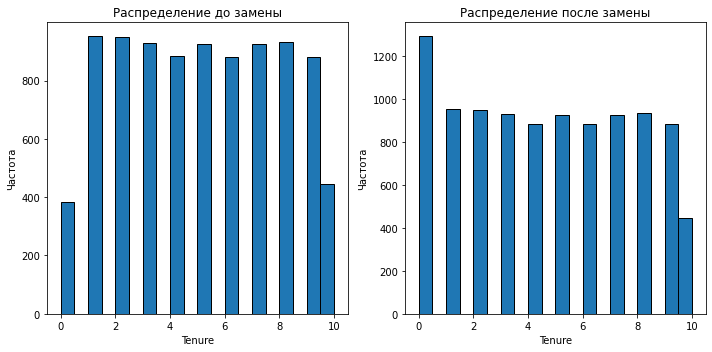

In [65]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Распределение до замены')
plt.hist(data_tenure['Tenure'].dropna(), bins=20, edgecolor='k')
plt.xlabel('Tenure')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
plt.title('Распределение после замены')
plt.hist(data['Tenure'], bins=20, edgecolor='k')
plt.xlabel('Tenure')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()

Сравним распределения данных до и после замены. Они сильно не меняются, это может быть аргументом в пользу замены нулями. 

В итоге, после анализа, мы можем принять обоснованное решение о том, что заменяем пропущенные значения нулями.

**Для столбцов Geography, Gender необходимо будет выполнить преобразование категориальных признаков в численные:**

In [12]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [13]:
data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

**Когда данных в избытке, можно угодить в ловушку фиктивных признаков. Если в таблицу добавились три новых столбца, сильно связанных между собой, один из них можно не добавлять. Восстановить столбец можно по оставшимся двум. Так мы не попадём в дамми-ловушку:**

In [14]:
data = pd.get_dummies(data, drop_first=True)
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


**Вывод:**
   
- Проверили датафрейм на дубликаты, их не нашлось

- Удалили столбец RowNumber, так как он дублирует информацию о номере записи, которая и так есть в исходном датафрейме

- Проверили наличие дубликатов в столбце CustomerId, дубликатов не нашлось, значит данные о всех клиентах уникальны, поэтому попрощались и с этим столбцом

- Столбец Surname - это информация, которая идентифицирует пользователя. Наличие такого большого количества уникальных значений создает сложности для решения задачи, однако она не приносит ценности для качества будущей модели. Удалили этот столбец

- В столбце Tenure, содержащим информацию о том, сколько лет человек является клиентом банка  пропущено почти 10% значений от обшего числа. Избавляться от такого столбца нецелесообразно, поэтому мы  заменили его минимальным значением

- Выполнили  OHE  преобразование для столбцов Geography, Gender, избежали дамми-ловушки

In [66]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,4.543400,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,0.250900,0.247700,0.545700
std,96.653299,10.487806,3.111573,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,0.433553,0.431698,0.497932
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000
25%,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000,0.000000
50%,652.000000,37.000000,4.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,0.000000,1.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.000000,0.000000,1.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000


## Исследование задачи

### Разбиваем данные на выборки

In [15]:
#features содержит все признаки (характеристики), 
#которые будут использоваться для обучения модели, 
#а target — целевой признак, который модель будет пытаться предсказать.
features = data.drop('Exited', axis=1)
target = data['Exited']

**Будем использовать функцию train_test_split(), чтобы разделить исходные данные (features и target) на обучающую выборку (features_train и target_train) и еще одну выборку, которую мы назовем "промежуточной" (features_test и target_test). Значение test_size=0.4 указывает, что 40% данных будут в этой "промежуточной" выборке, а 60% данных составят обучающую выборку.**

In [16]:
features_train, features_test, target_train, target_test = train_test_split(features, 
                                                                            target, 
                                                                            test_size=0.4, 
                                                                            random_state=12345
                                                                           ) 

**Затем мы продолжим делить "промежуточную" выборку на валидационную и тестовую выборки:**

In [17]:
features_valid, features_test, target_valid, target_test = train_test_split(features_test, 
                                                                            target_test, 
                                                                            test_size=0.5, 
                                                                            random_state=12345
                                                                           ) 

**Поскольку мы использовали test_size=0.5, "промежуточная" выборка была поровну разделена на валидационную (features_valid и target_valid) и тестовую (features_test и target_test) выборки. Это означает, что размер валидационной и тестовой выборки равен 20% от размера исходных данных (0.4 * 0.5 = 0.2).**

Можем проверить размеры этих выборок, чтобы убедиться в правильности разбиения:

In [18]:
print("Обучающая выборка:")
print(features_train.shape)
print(target_train.shape)

print("\nВалидационная выборка:")
print(features_valid.shape)
print(target_valid.shape)

print("\nТестовая выборка:")
print(features_test.shape)
print(target_test.shape)

Обучающая выборка:
(6000, 11)
(6000,)

Валидационная выборка:
(2000, 11)
(2000,)

Тестовая выборка:
(2000, 11)
(2000,)


**В результате разбиения мы получили:**

1. Обучающую выборку размером 60% от исходных данных.
2. Валидационную выборку размером 20% от исходных данных.
3. Тестовую выборку размером 20% от исходных данных.

### Масштабирование признаков

Если в данных присутствуют колличественные признаки с разными разбросами значений, то алгорим может решить, что признаки с большими значениями и разбросом важнее. Чтобы избежать этой ловушки, признаки масштабируются — приводятся к одному масштабу.

In [19]:
numerical = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

In [20]:
scaler = StandardScaler()
scaler.fit(features_train[numerical])
None

In [21]:
features_train[numerical] = scaler.transform(features_train[numerical])
features_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7479,-0.886751,-0.373192,1.104696,1.232271,-0.891560,1,0,-0.187705,0,1,1
3411,0.608663,-0.183385,1.104696,0.600563,-0.891560,0,0,-0.333945,0,0,0
6027,2.052152,0.480939,-0.503694,1.027098,0.830152,0,1,1.503095,1,0,1
1247,-1.457915,-1.417129,0.461340,-1.233163,0.830152,1,0,-1.071061,0,0,1
3716,0.130961,-1.132419,-0.825373,1.140475,-0.891560,0,0,1.524268,1,0,0


In [22]:
features_valid[numerical] = scaler.transform(features_valid[numerical])
features_valid.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
8532,-0.699824,-0.373192,-0.825373,-1.233163,0.830152,1,0,-0.015173,0,0,0
5799,-0.284431,0.575842,-0.503694,-1.233163,-0.891560,1,1,1.471724,0,0,0
5511,0.151731,-0.657902,-1.468729,0.438711,-0.891560,1,0,-1.367107,1,0,1
7365,-0.876366,-0.278288,1.748053,1.239884,-0.891560,1,1,-0.786517,0,1,0
7367,-0.481743,0.291132,1.748053,-1.233163,0.830152,1,0,1.358533,0,1,1


In [23]:
features_test[numerical] = scaler.transform(features_test[numerical])
features_test.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7041,-2.226392,-0.088482,-0.825373,-1.233163,0.830152,1,0,0.647083,0,0,1
5709,-0.087120,0.006422,1.426375,-1.233163,-0.891560,1,0,-1.658410,0,0,0
7117,-0.917905,-0.752805,0.139662,0.722307,-0.891560,1,1,-1.369334,0,1,1
7775,-0.253277,0.101325,1.748053,-1.233163,0.830152,1,0,0.075086,0,1,1
8735,0.785204,-0.847708,1.748053,0.615625,-0.891560,0,1,-1.070919,0,0,1


### Проверим наличие дисбаланса

0    0.7963
1    0.2037
Name: Exited, dtype: float64


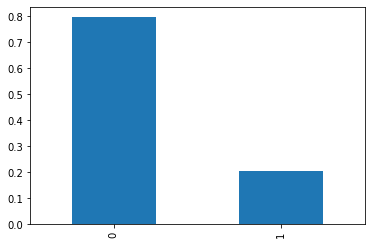

In [24]:
quantity = data['Exited'].value_counts(normalize=1)
print(quantity)
quantity.plot(kind='bar')
None

В целевом признаке очевиден сильный **дисбаланс**, отрицательных ответов почти 80% , а положитительных чуть больше 20%.

### Обучение моделей до борьбы с дисбалансом 

**`DecisionTreeClassifier` - это структура данных для классификации деревом решений.**

In [25]:
best_model_DecisionTreeClassifier = None
best_result_DecisionTreeClassifier = 0
for depth in range(1, 11):
    model_DecisionTreeClassifier = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model_DecisionTreeClassifier.fit(features_train, target_train) 
    predictions_DecisionTreeClassifier = model_DecisionTreeClassifier.predict(features_valid) 
    result_DecisionTreeClassifier = f1_score(target_valid, predictions_DecisionTreeClassifier) 
    if result_DecisionTreeClassifier > best_result_DecisionTreeClassifier:
        best_model_DecisionTreeClassifier = model_DecisionTreeClassifier
        best_result_DecisionTreeClassifier = result_DecisionTreeClassifier
        best_decisiontreeclassifier_depth = depth
        
print("Качество лучшей модели:", best_result_DecisionTreeClassifier, "с гиперпараметром max_depth: =",best_decisiontreeclassifier_depth)

Качество лучшей модели: 0.5786516853932585 с гиперпараметром max_depth: = 9


**Обучим модель с оптимальными значениями гиперпараметров:**

In [26]:
model_DecisionTreeClassifier = DecisionTreeClassifier(random_state=12345,
                                    max_depth=9)
model_DecisionTreeClassifier.fit(features_train, target_train)
predictions_DecisionTreeClassifier_valid = model_DecisionTreeClassifier.predict(features_valid)

In [27]:
print("Accuracy_DecisionTreeClassifier:", accuracy_score(target_valid, predictions_DecisionTreeClassifier_valid))
print("Recall_DecisionTreeClassifier:", recall_score(target_valid, predictions_DecisionTreeClassifier_valid))
print("Precision_DecisionTreeClassifier:", precision_score(target_valid, predictions_DecisionTreeClassifier_valid))
print("F1_DecisionTreeClassifier:", f1_score(target_valid, predictions_DecisionTreeClassifier_valid))

Accuracy_DecisionTreeClassifier: 0.85
Recall_DecisionTreeClassifier: 0.49282296650717705
Precision_DecisionTreeClassifier: 0.7006802721088435
F1_DecisionTreeClassifier: 0.5786516853932585


**`RandomForestClassifier`**

**Ещё один из алгоритмов классификации - случайный лес (random forest). Алгоритм обучает большое количество независимых друг от друга деревьев, а потом принимает решение на основе голосования. Случайный лес помогает улучшить результат предсказания и избежать переобучения.**

In [28]:
best_model_RandomForestClassifier = None
best_result_RandomForestClassifier = 0  
best_n_estimators = 0
best_depth = 0
for est in range(10, 101, 5):
    for depth in range(1, 10):
        model_RandomForestClassifier = RandomForestClassifier(random_state=12345,
                                                             n_estimators=est, 
                                                             max_depth=depth)
        model_RandomForestClassifier.fit(features_train, target_train)
        predictions_RandomForestClassifier = model_RandomForestClassifier.predict(features_valid)
        result_randomforestclassifier = f1_score(target_valid, predictions_RandomForestClassifier)
        if result_randomforestclassifier > best_result_RandomForestClassifier:
            best_model_RandomForestClassifier = model_RandomForestClassifier
            best_result_RandomForestClassifier = result_randomforestclassifier 
            best_n_estimators = est
            best_depth = depth

print("Качество наилучшей модели:", best_result_RandomForestClassifier,  "с гиперпараметром max_depth: =",best_depth, "и с n_estimators:=", 
     best_n_estimators)

Качество наилучшей модели: 0.5800604229607251 с гиперпараметром max_depth: = 9 и с n_estimators:= 10


**Обучим модель с оптимальными значениями гиперпараметров:**

In [29]:
model_RandomForestClassifier = RandomForestClassifier(random_state=12345, 
                                      n_estimators=10, 
                                      max_depth=9)
model_RandomForestClassifier.fit(features_train, target_train)
predictions_model_RandomForestClassifier = model_RandomForestClassifier.predict(features_valid)

In [30]:
print("Accuracy_RandomForestClassifier:", accuracy_score(target_valid, predictions_model_RandomForestClassifier))
print("Recall_RandomForestClassifier:", recall_score(target_valid, predictions_model_RandomForestClassifier))
print("Precision_RandomForestClassifier:", precision_score(target_valid, predictions_model_RandomForestClassifier))
print("F1_RandomForestClassifier:", f1_score(target_valid, predictions_model_RandomForestClassifier))

Accuracy_RandomForestClassifier: 0.861
Recall_RandomForestClassifier: 0.45933014354066987
Precision_RandomForestClassifier: 0.7868852459016393
F1_RandomForestClassifier: 0.5800604229607251


**`LogisticRegression`**

**Ещё один алгоритм машинного обучения - логистическая регрессия.
В логистической регрессии параметров мало. Что-либо вызубрить по признакам в формуле не выйдет, поэтому и вероятность переобучения невелика.**

In [31]:
model_logisticregression = LogisticRegression(random_state=12345, solver='liblinear')
model_logisticregression.fit(features_train, target_train) 
predictions_logisticregression = model_logisticregression.predict(features_valid) 
result_logisticregression = f1_score(predictions_logisticregression, target_valid) 
        
print("Качество модели:", result_logisticregression)

Качество модели: 0.33389544688026984


In [32]:
print("Accuracy_logisticregression:", accuracy_score(target_valid, predictions_logisticregression))
print("Recall_logisticregression:", recall_score(target_valid, predictions_logisticregression))
print("Precision_logisticregression:", precision_score(target_valid, predictions_logisticregression))
print("F1_logisticregression:", f1_score(target_valid, predictions_logisticregression))

Accuracy_logisticregression: 0.8025
Recall_logisticregression: 0.23684210526315788
Precision_logisticregression: 0.5657142857142857
F1_logisticregression: 0.33389544688026984


**Приведем оценки моделей по качеству - F1-score:**

**`DecisionTreeClassifier`**

Качество модели = 0.578

**`RandomForestClassifier`**

Качество модели = 0.580

**`LogisticRegression`**

Качество модели = 0.333

После обучения моделей без учета дисбаланса классов, можем сделать вывод, что наилучшее значение метрики F1-score показывает модель **`RandomForestClassifier`**.

**Теперь посмотрим, как выглядит дисбаланс классов для 3 наших обученных моделей, для этого построим матрицы ошибок:**

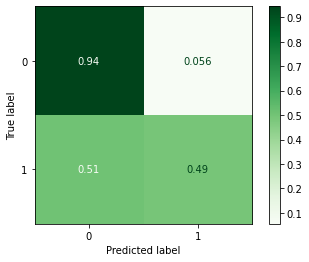

In [33]:
plot_confusion_matrix(estimator=model_DecisionTreeClassifier, X=features_valid, y_true=target_valid,
                      normalize='true', cmap='Greens')
None

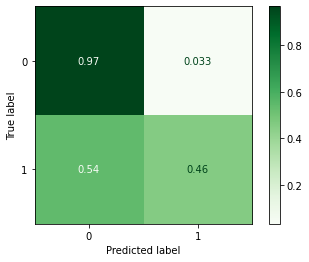

In [34]:
plot_confusion_matrix(estimator=model_RandomForestClassifier, X=features_valid, y_true=target_valid,
                      normalize='true', cmap='Greens')
None

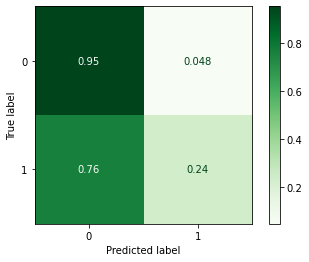

In [35]:
plot_confusion_matrix(estimator=model_logisticregression, X=features_valid, y_true=target_valid,
                      normalize='true', cmap='Greens')
None

Матрицы ошибок нам показывают, что для всех трех наших моделей наблюдается сильный дисбаланс классов.

## Борьба с дисбалансом

Будем использовать 3 метода для борьбы с дисбалансом : 

- Взвешивание классов
- Увеличение выборки (upsampling)
- Уменьшение выборки (downsampling)

### Взвешивание классов

`DecisionTreeClassifier`

In [36]:
best_model_DecisionTreeClassifier = None
best_result_DecisionTreeClassifier = 0
for depth in range(1, 11):
    model_DecisionTreeClassifier = DecisionTreeClassifier(random_state=12345, max_depth=depth, class_weight='balanced')
    model_DecisionTreeClassifier.fit(features_train, target_train) 
    predictions_DecisionTreeClassifier = model_DecisionTreeClassifier.predict(features_valid) 
    result_DecisionTreeClassifier = f1_score(target_valid, predictions_DecisionTreeClassifier) 
    if result_DecisionTreeClassifier > best_result_DecisionTreeClassifier:
        best_model_DecisionTreeClassifier = model_DecisionTreeClassifier
        best_result_DecisionTreeClassifier = result_DecisionTreeClassifier
        best_decisiontreeclassifier_depth = depth
        
print("Качество лучшей модели:", best_result_DecisionTreeClassifier, "с гиперпараметром max_depth: =",best_decisiontreeclassifier_depth)

Качество лучшей модели: 0.5963791267305644 с гиперпараметром max_depth: = 5


**Обучим модель с оптимальными значениями гиперпараметров:**

In [37]:
model_DecisionTreeClassifier = DecisionTreeClassifier(random_state=12345,
                                    max_depth=5, class_weight='balanced')
model_DecisionTreeClassifier.fit(features_train, target_train)
predictions_DecisionTreeClassifier_valid = model_DecisionTreeClassifier.predict(features_valid)

In [38]:
print("Recall_DecisionTreeClassifier:", recall_score(target_valid, predictions_DecisionTreeClassifier))
print("Precision_DecisionTreeClassifier:", precision_score(target_valid, predictions_DecisionTreeClassifier))
print("F1_DecisionTreeClassifier:", f1_score(target_valid, predictions_DecisionTreeClassifier))

probabilities = model_DecisionTreeClassifier.predict_proba(features_valid)
probabilities_one = probabilities[:, 1]
print("ROC-AUC_DecisionTreeClassifier:", roc_auc_score(target_valid, probabilities_one))

Recall_DecisionTreeClassifier: 0.6411483253588517
Precision_DecisionTreeClassifier: 0.432258064516129
F1_DecisionTreeClassifier: 0.5163776493256262
ROC-AUC_DecisionTreeClassifier: 0.8310244134068074


`RandomForestClassifier`

In [39]:
best_model_RandomForestClassifier = None
best_result_RandomForestClassifier = 0  
best_n_estimators = 0
best_depth = 0
for est in range(10, 101, 5):
    for depth in range(1, 10):
        model_RandomForestClassifier = RandomForestClassifier(random_state=12345,
                                                             n_estimators=est, 
                                                             max_depth=depth, class_weight='balanced')
        model_RandomForestClassifier.fit(features_train, target_train)
        predictions_RandomForestClassifier = model_RandomForestClassifier.predict(features_valid)
        result_randomforestclassifier = f1_score(target_valid, predictions_RandomForestClassifier)
        if result_randomforestclassifier > best_result_RandomForestClassifier:
            best_model_RandomForestClassifier = model_RandomForestClassifier
            best_result_RandomForestClassifier = result_randomforestclassifier 
            best_n_estimators = est
            best_depth = depth

print("Качество наилучшей модели:", best_result_RandomForestClassifier,  "с гиперпараметром max_depth: =",best_depth, "и с n_estimators:=", 
     best_n_estimators)

Качество наилучшей модели: 0.631236442516269 с гиперпараметром max_depth: = 8 и с n_estimators:= 50


**Обучим модель с оптимальными значениями гиперпараметров:**

In [40]:
model_RandomForestClassifier = RandomForestClassifier(random_state=12345, 
                                      n_estimators=50, 
                                      max_depth=8, class_weight='balanced')
model_RandomForestClassifier.fit(features_train, target_train)
predictions_model_RandomForestClassifier = model_RandomForestClassifier.predict(features_valid)

In [41]:
print("Recall_RandomForestClassifier:", recall_score(target_valid, predictions_model_RandomForestClassifier))
print("Precision_RandomForestClassifier:", precision_score(target_valid, predictions_model_RandomForestClassifier))
print("F1_RandomForestClassifier:", f1_score(target_valid, predictions_model_RandomForestClassifier))

probabilities = model_RandomForestClassifier.predict_proba(features_valid)
probabilities_one = probabilities[:, 1]
print("ROC-AUC_RandomForestClassifier:", roc_auc_score(target_valid, probabilities_one))

Recall_RandomForestClassifier: 0.6961722488038278
Precision_RandomForestClassifier: 0.5773809523809523
F1_RandomForestClassifier: 0.631236442516269
ROC-AUC_RandomForestClassifier: 0.8544722627163244


`LogisticRegression`

In [42]:
model_logisticregression = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model_logisticregression.fit(features_train, target_train) 
predictions_logisticregression = model_logisticregression.predict(features_valid) 

In [43]:
print("Recall_logisticregression:", recall_score(target_valid, predictions_logisticregression))
print("Precision_logisticregression:", precision_score(target_valid, predictions_logisticregression))
print("F1_logisticregression:", f1_score(target_valid, predictions_logisticregression))

probabilities = model_RandomForestClassifier.predict_proba(features_valid)
probabilities_one = probabilities[:, 1]
print("ROC-AUC_logisticregression:", roc_auc_score(target_valid, probabilities_one))

Recall_logisticregression: 0.6842105263157895
Precision_logisticregression: 0.3803191489361702
F1_logisticregression: 0.4888888888888888
ROC-AUC_logisticregression: 0.8544722627163244


### Увеличение выборки (upsampling)

Upsampling


Техника балансирования классов, которая заключается в увеличении числа объектов меньшего класса путём многократного копирования объектов меньшего класса

In [44]:
# Увеличиваем выборку в 4 раза, так как отрицательный класс превышает положительный в 4 раза
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    # Соединяем 
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    # Перемешиваем объекты
    features_upsampled = shuffle(features_upsampled, random_state=12345)
    target_upsampled = shuffle(target_upsampled, random_state=12345)
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

print(features_upsampled.shape)
print(target_upsampled.shape)

(9588, 11)
(9588,)


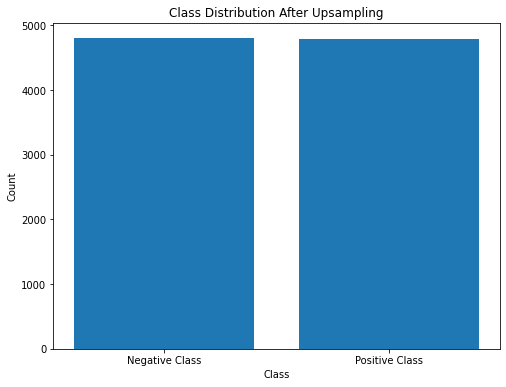

In [69]:
# Создаем датафрейм из целевой переменной target_upsampled
df_upsampled = pd.DataFrame({'Target': target_upsampled})

# Группируем объекты по классам
class_counts = df_upsampled['Target'].value_counts()

# Создаем барплот
plt.figure(figsize=(8, 6))
plt.bar(class_counts.index, class_counts.values)
plt.xticks(class_counts.index, ['Negative Class', 'Positive Class'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution After Upsampling')
plt.show()

`DecisionTreeClassifier`

In [45]:
best_model_DecisionTreeClassifier = None
best_result_DecisionTreeClassifier = 0
for depth in range(1, 11):
    model_DecisionTreeClassifier = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model_DecisionTreeClassifier.fit(features_upsampled, target_upsampled) 
    predictions_DecisionTreeClassifier = model_DecisionTreeClassifier.predict(features_valid) 
    result_DecisionTreeClassifier = f1_score(target_valid, predictions_DecisionTreeClassifier) 
    if result_DecisionTreeClassifier > best_result_DecisionTreeClassifier:
        best_model_DecisionTreeClassifier = model_DecisionTreeClassifier
        best_result_DecisionTreeClassifier = result_DecisionTreeClassifier
        best_decisiontreeclassifier_depth = depth
        
print("Качество лучшей модели:", best_result_DecisionTreeClassifier, "с гиперпараметром max_depth: =",best_decisiontreeclassifier_depth)

Качество лучшей модели: 0.5963791267305644 с гиперпараметром max_depth: = 5


In [46]:
model_DecisionTreeClassifier = DecisionTreeClassifier(random_state=12345,
                                    max_depth=5)
model_DecisionTreeClassifier.fit(features_upsampled, target_upsampled) 
predictions_DecisionTreeClassifier_valid = model_DecisionTreeClassifier.predict(features_valid)

print("Recall_DecisionTreeClassifier:", recall_score(target_valid, predictions_DecisionTreeClassifier))
print("Precision_DecisionTreeClassifier:", precision_score(target_valid, predictions_DecisionTreeClassifier))
print("F1_DecisionTreeClassifier:", f1_score(target_valid, predictions_DecisionTreeClassifier))

probabilities = model_DecisionTreeClassifier.predict_proba(features_valid)
probabilities_one = probabilities[:, 1]
print("ROC-AUC_DecisionTreeClassifier:", roc_auc_score(target_valid, probabilities_one))

Recall_DecisionTreeClassifier: 0.6435406698564593
Precision_DecisionTreeClassifier: 0.4395424836601307
F1_DecisionTreeClassifier: 0.5223300970873788
ROC-AUC_DecisionTreeClassifier: 0.8310244134068074


`RandomForestClassifier`

In [47]:
best_model_RandomForestClassifier = None
best_result_RandomForestClassifier = 0  
best_n_estimators = 0
best_depth = 0
for est in range(10, 101, 5):
    for depth in range(1, 10):
        model_RandomForestClassifier = RandomForestClassifier(random_state=12345,
                                                             n_estimators=est, 
                                                             max_depth=depth)
        model_RandomForestClassifier.fit(features_upsampled, target_upsampled)
        predictions_RandomForestClassifier = model_RandomForestClassifier.predict(features_valid)
        result_randomforestclassifier = f1_score(target_valid, predictions_RandomForestClassifier)
        if result_randomforestclassifier > best_result_RandomForestClassifier:
            best_model_RandomForestClassifier = model_RandomForestClassifier
            best_result_RandomForestClassifier = result_randomforestclassifier 
            best_n_estimators = est
            best_depth = depth

print("Качество наилучшей модели:", best_result_RandomForestClassifier,  "с гиперпараметром max_depth: =",best_depth, "и с n_estimators:=", 
     best_n_estimators)

Качество наилучшей модели: 0.6255060728744939 с гиперпараметром max_depth: = 7 и с n_estimators:= 20


In [48]:
model_RandomForestClassifier = RandomForestClassifier(random_state=12345, 
                                      n_estimators=20, 
                                      max_depth=7)
model_RandomForestClassifier.fit(features_upsampled, target_upsampled)
predictions_model_RandomForestClassifier = model_RandomForestClassifier.predict(features_valid)

print("Recall_RandomForestClassifier:", recall_score(target_valid, predictions_model_RandomForestClassifier))
print("Precision_RandomForestClassifier:", precision_score(target_valid, predictions_model_RandomForestClassifier))
print("F1_RandomForestClassifier:", f1_score(target_valid, predictions_model_RandomForestClassifier))

probabilities = model_RandomForestClassifier.predict_proba(features_valid)
probabilities_one = probabilities[:, 1]
print("ROC-AUC_RandomForestClassifier:", roc_auc_score(target_valid, probabilities_one))

Recall_RandomForestClassifier: 0.7392344497607656
Precision_RandomForestClassifier: 0.5421052631578948
F1_RandomForestClassifier: 0.6255060728744939
ROC-AUC_RandomForestClassifier: 0.8551724242222611


`LogisticRegression`

In [49]:
model_logisticregression = LogisticRegression(random_state=12345, solver='liblinear')
model_logisticregression.fit(features_upsampled, target_upsampled)
predictions_logisticregression = model_logisticregression.predict(features_valid) 

print("Recall_logisticregression:", recall_score(target_valid, predictions_logisticregression))
print("Precision_logisticregression:", precision_score(target_valid, predictions_logisticregression))
print("F1_logisticregression:", f1_score(target_valid, predictions_logisticregression))

probabilities = model_RandomForestClassifier.predict_proba(features_valid)
probabilities_one = probabilities[:, 1]
print("ROC-AUC_logisticregression:", roc_auc_score(target_valid, probabilities_one))

Recall_logisticregression: 0.6842105263157895
Precision_logisticregression: 0.3803191489361702
F1_logisticregression: 0.4888888888888888
ROC-AUC_logisticregression: 0.8551724242222611


### Уменьшение выборки (downsampling)

Downsampling


Техника балансирования классов, которая заключается в уменьшении числа объектов большего класса путём случайного удаления объектов большего класса

In [50]:
# Уменьшаем выборку в 4 раза, так как положительный класс превышает отрицательный в 4 раза
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]


    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=12345)] +
                                     [features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=12345)] +
                                   [target_ones])
    
    features_downsampled = shuffle(features_downsampled, random_state=12345)
    target_downsampled = shuffle(target_downsampled, random_state=12345)

    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

print(features_downsampled.shape)
print(target_downsampled.shape)

(2397, 11)
(2397,)


`DecisionTreeClassifier`

In [51]:
best_model_DecisionTreeClassifier = None
best_result_DecisionTreeClassifier = 0
for depth in range(1, 11):
    model_DecisionTreeClassifier = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model_DecisionTreeClassifier.fit(features_downsampled, target_downsampled) 
    predictions_DecisionTreeClassifier = model_DecisionTreeClassifier.predict(features_valid) 
    result_DecisionTreeClassifier = f1_score(target_valid, predictions_DecisionTreeClassifier) 
    if result_DecisionTreeClassifier > best_result_DecisionTreeClassifier:
        best_model_DecisionTreeClassifier = model_DecisionTreeClassifier
        best_result_DecisionTreeClassifier = result_DecisionTreeClassifier
        best_decisiontreeclassifier_depth = depth
        
print("Качество лучшей модели:", best_result_DecisionTreeClassifier, "с гиперпараметром max_depth: =",best_decisiontreeclassifier_depth)

Качество лучшей модели: 0.5931174089068827 с гиперпараметром max_depth: = 5


In [52]:
model_DecisionTreeClassifier = DecisionTreeClassifier(random_state=12345,
                                    max_depth=5)
model_DecisionTreeClassifier.fit(features_downsampled, target_downsampled) 
predictions_DecisionTreeClassifier_valid = model_DecisionTreeClassifier.predict(features_valid)

print("Recall_DecisionTreeClassifier:", recall_score(target_valid, predictions_DecisionTreeClassifier))
print("Precision_DecisionTreeClassifier:", precision_score(target_valid, predictions_DecisionTreeClassifier))
print("F1_DecisionTreeClassifier:", f1_score(target_valid, predictions_DecisionTreeClassifier))

probabilities = model_DecisionTreeClassifier.predict_proba(features_valid)
probabilities_one = probabilities[:, 1]
print("ROC-AUC_DecisionTreeClassifier:", roc_auc_score(target_valid, probabilities_one))

Recall_DecisionTreeClassifier: 0.6698564593301436
Precision_DecisionTreeClassifier: 0.4268292682926829
F1_DecisionTreeClassifier: 0.521415270018622
ROC-AUC_DecisionTreeClassifier: 0.82291433531536


`RandomForestClassifier`

In [53]:
best_model_RandomForestClassifier = None
best_result_RandomForestClassifier = 0  
best_n_estimators = 0
best_depth = 0
for est in range(10, 101, 5):
    for depth in range(1, 10):
        model_RandomForestClassifier = RandomForestClassifier(random_state=12345,
                                                             n_estimators=est, 
                                                             max_depth=depth)
        model_RandomForestClassifier.fit(features_downsampled, target_downsampled)
        predictions_RandomForestClassifier = model_RandomForestClassifier.predict(features_valid)
        result_randomforestclassifier = f1_score(target_valid, predictions_RandomForestClassifier)
        if result_randomforestclassifier > best_result_RandomForestClassifier:
            best_model_RandomForestClassifier = model_RandomForestClassifier
            best_result_RandomForestClassifier = result_randomforestclassifier 
            best_n_estimators = est
            best_depth = depth

print("Качество наилучшей модели:", best_result_RandomForestClassifier,  "с гиперпараметром max_depth: =",best_depth, "и с n_estimators:=", 
     best_n_estimators)

Качество наилучшей модели: 0.6036217303822937 с гиперпараметром max_depth: = 4 и с n_estimators:= 10


In [54]:
model_RandomForestClassifier = RandomForestClassifier(random_state=12345, 
                                      n_estimators=10, 
                                      max_depth=4)
model_RandomForestClassifier.fit(features_downsampled, target_downsampled) 
predictions_model_RandomForestClassifier = model_RandomForestClassifier.predict(features_valid)

print("Recall_RandomForestClassifier:", recall_score(target_valid, predictions_model_RandomForestClassifier))
print("Precision_RandomForestClassifier:", precision_score(target_valid, predictions_model_RandomForestClassifier))
print("F1_RandomForestClassifier:", f1_score(target_valid, predictions_model_RandomForestClassifier))

probabilities = model_RandomForestClassifier.predict_proba(features_valid)
probabilities_one = probabilities[:, 1]
print("ROC-AUC_RandomForestClassifier:", roc_auc_score(target_valid, probabilities_one))

Recall_RandomForestClassifier: 0.7177033492822966
Precision_RandomForestClassifier: 0.5208333333333334
F1_RandomForestClassifier: 0.6036217303822937
ROC-AUC_RandomForestClassifier: 0.835229163012116


`LogisticRegression`

In [55]:
model_logisticregression = LogisticRegression(random_state=12345, solver='liblinear')
model_logisticregression.fit(features_downsampled, target_downsampled) 
predictions_logisticregression = model_logisticregression.predict(features_valid) 

print("Recall_logisticregression:", recall_score(target_valid, predictions_logisticregression))
print("Precision_logisticregression:", precision_score(target_valid, predictions_logisticregression))
print("F1_logisticregression:", f1_score(target_valid, predictions_logisticregression))

probabilities = model_RandomForestClassifier.predict_proba(features_valid)
probabilities_one = probabilities[:, 1]
print("ROC-AUC_logisticregression:", roc_auc_score(target_valid, probabilities_one))

Recall_logisticregression: 0.6818181818181818
Precision_logisticregression: 0.3815261044176707
F1_logisticregression: 0.4892703862660944
ROC-AUC_logisticregression: 0.835229163012116


### Сравнение значений метрик F1-score наших моделей 

In [56]:
us_model = ['DecisionTreeClassifier', 'RandomForestClassifier', 'LogisticRegression']
initial_values = [0.578, 0.580, 0.33]
weighting_values = [0.516, 0.631, 0.488]
down_values = [0.521, 0.603, 0.489]
up_values = [0.522, 0.625, 0.488]

df_f1 = pd.DataFrame({'Model': us_model,
                           'Initial': initial_values,
                           'Weighing': weighting_values,
                           'Downsampling': down_values,
                           'Upsampling': up_values })

df_f1

,Model,Initial,Weighing,Downsampling,Upsampling
0,DecisionTreeClassifier,0.578,0.516,0.521,0.522
1,RandomForestClassifier,0.580,0.631,0.603,0.625
2,LogisticRegression,0.330,0.488,0.489,0.488


- Уменьшение и увеличение выборки достигают почти одинакового значения F1-score.
- Наибольшее значение метрики F1-score мы получили с моделью `RandomForestClassifier` при помощи обучения  со взвешиванием классов.  Для тестирования будем использовать данную модель.
- Значения метрик AUC-ROC всегда выше F1-score и превышают 80%.

## Тестирование модели

Наибольшее значение метрики F1-score мы получили с моделью RandomForestClassifier при помощи обучения со взвешиванием классов. Для тестирования будем использовать данную модель.

In [57]:
best_model_RandomForestClassifier = None
best_result_RandomForestClassifier = 0  
best_n_estimators = 0
best_depth = 0
for est in range(10, 101, 5):
    for depth in range(1, 10):
        model_RandomForestClassifier = RandomForestClassifier(random_state=12345,
                                                             n_estimators=est, 
                                                             max_depth=depth, class_weight='balanced')
        model_RandomForestClassifier.fit(features_train, target_train)
        predictions_RandomForestClassifier = model_RandomForestClassifier.predict(features_valid)
        result_randomforestclassifier = f1_score(target_valid, predictions_RandomForestClassifier)
        if result_randomforestclassifier > best_result_RandomForestClassifier:
            best_model_RandomForestClassifier = model_RandomForestClassifier
            best_result_RandomForestClassifier = result_randomforestclassifier 
            best_n_estimators = est
            best_depth = depth

print("Качество наилучшей модели:", best_result_RandomForestClassifier,  "с гиперпараметром max_depth: =",best_depth, "и с n_estimators:=", 
     best_n_estimators)

Качество наилучшей модели: 0.631236442516269 с гиперпараметром max_depth: = 8 и с n_estimators:= 50


**Обучим модель с оптимальными значениями гиперпараметров:**

In [58]:
model_RandomForestClassifier = RandomForestClassifier(random_state=12345, 
                                      n_estimators=50, 
                                      max_depth=8, class_weight='balanced')
model_RandomForestClassifier.fit(features_train, target_train) 
predictions_model_RandomForestClassifier = model_RandomForestClassifier.predict(features_test)

print("Recall_RandomForestClassifier:", recall_score(target_test, predictions_model_RandomForestClassifier))
print("Precision_RandomForestClassifier:", precision_score(target_test, predictions_model_RandomForestClassifier))
print("F1_RandomForestClassifier:", f1_score(target_test, predictions_model_RandomForestClassifier))

probabilities = model_RandomForestClassifier.predict_proba(features_test)
probabilities_one = probabilities[:, 1]
print("ROC-AUC_RandomForestClassifier:", roc_auc_score(target_test, probabilities_one))

Recall_RandomForestClassifier: 0.6690307328605201
Precision_RandomForestClassifier: 0.5570866141732284
F1_RandomForestClassifier: 0.6079484425349088
ROC-AUC_RandomForestClassifier: 0.8520922060770143


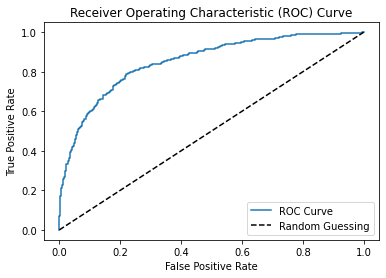

In [59]:
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one)
plt.figure()
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## Вывод 

**Подготовили данные:**
- Проверили датафрейм на дубликаты, их не нашлось

- Удалили столбец RowNumber, так как он дублирует информацию о номере записи, которая и так есть в исходном датафрейме

- Проверили наличие дубликатов в столбце CustomerId, дубликатов не нашлось, значит данные о всех клиентах уникальны, поэтому попрощались и с этим столбцом

- Столбец Surname - это информация, которая идентифицирует пользователя. Наличие такого большого количества уникальных значений создает сложности для решения задачи, однако она не приносит ценности для качества будущей модели. Удалили этот столбец

- В столбце Tenure, содержащим информацию о том, сколько лет человек является клиентом банка  пропущено почти 10% значений от обшего числа. Избавляться от такого столбца нецелесообразно, поэтому мы  заменили его минимальным значением

- Выполнили  OHE  преобразование для столбцов Geography, Gender, избежали дамми-ловушки

**Исследовали задачу:**
- Разбили наши данные на 3 выборки, в результате разбиения мы получили:
    - Обучающую выборку размером 60% от исходных данных.
    - Валидационную выборку размером 20% от исходных данных.
    - Тестовую выборку размером 20% от исходных данных.
    
- Масштабировали наши признаки

- Выяснили, что целевом признаке очевиден сильный дисбаланс, отрицательных ответов почти 80% , а положитительных чуть больше 20%

- Обучили наши модели до борьбы с дисбалансом, матрицы ошибок нам показали, что для всех трех наших моделей наблюдается сильный дисбаланс классов.

**Борьба с дисбалансом:**
- Использовали  3 метода для борьбы с дисбалансом :
    - Взвешивание классов
    - Увеличение выборки (upsampling)
    - Уменьшение выборки (downsampling)
    
- Выяснили, что: 
    - Уменьшение и увеличение выборки достигают почти одинакового значения F1-score.
    - Наибольшее значение метрики F1-score мы получили с моделью RandomForestClassifier при помощи обучения со взвешиванием классов. Для тестирования будем использовать данную модель.
    - Значения метрик AUC-ROC всегда выше F1-score и превышают 80%.

**Тестирование модели:**
- Наибольшее значение метрики F1-score мы получили с моделью RandomForestClassifier при помощи обучения со взвешиванием классов. Для тестирования использовали данную модель.

- Удалось достичь F1-меры не менее 0.59

- Исследована метрика AUC-ROC